In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport # profile report を作る用


In [2]:
TRAIN_PATH = "/home/knikaido/work/atma10/data/train.csv"
TEST_PATH = "/home/knikaido/work/atma10/data/test.csv"
SUB_PATH = "/home/knikaido/work/atma10/data/atmacup10__sample_submission.csv"

In [3]:
SEED = 42
N_SPLITS = 5
SHUFFLE = True
LGBM_PARAMS = {'num_leaves': 32,
               'min_data_in_leaf': 64,
               'objective': 'regression',
               'max_depth': -1,
               'learning_rate': 0.05,
               "boosting": "gbdt",
               "bagging_freq": 1,
               "bagging_fraction": 0.8,
               "bagging_seed": SEED,
               "verbosity": -1,
              'reg_alpha': 0.1,
              'reg_lambda': 0.3,
              'colsample_bytree': 0.7,
              'metric':"rmse",
              'num_threads':6,
         }

LGBM_FIT_PARAMS = {
    'num_boost_round': 10000,
    'early_stopping_rounds': 200,
    'verbose_eval': 200,
}

SAVE_TEST_SUB_PATH = "sub01.csv"

In [4]:
def seed_everything(seed: int):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
seed_everything(SEED)

In [5]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [6]:
report = ProfileReport(train)
report.to_file('train_report.html')

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train.sort_values('likes', ascending=False, inplace=True)
train

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
9610,cce5692fcc2d683c83e6,b3fe6620a23a80a4766d,"Night Watch, Militia Company of District II un...",Officieren en andere schutters van wijk II in ...,"Night Watch, Militia Company of District II un...",Rembrandt van Rijn,Rembrandt van Rijn,h 379.5cm × w 453.5cm × w 337kg,NaN,Officers and other civic guardsmen of District...,loan,1808-01-01T00:00:00,On loan from the City of Amsterdam,1642,1642.0,17,1642.0,1642.0,27392
1447,1eae1bab484d72d0000a,4835e3cb2e57975817d7,Still Life with Flowers in a Glass Vase,Stilleven met bloemen in een glazen vaas op ee...,"Still Life with Flowers in a Glass Vase, Jan D...",Jan Davidsz. de Heem,Jan Davidsz. de Heem,h 54.5cm × w 36.5cm × d 7.8cm,NaN,Still Life with Flowers in a Glass Vase,loan,1885-06-30T00:00:00,On loan from the City of Amsterdam (A. van der...,1650 - 1683,1650.0,17,1650.0,1683.0,21685
2962,3fc75b941bb6c1529f05,37176565918cd6413a82,Children of the Sea,Voorstelling getiteld 'Kinderen der zee'. Vier...,"Children of the Sea, Jozef Israëls, 1872",Jozef Israëls,Jozef Israëls,h 48.5cm × w 93.5cm,NaN,Children of the Sea,bequest,1907-01-01T00:00:00,"J.B.A.M. Westerwoudt Bequest, Haarlem",1872,1872.0,19,1872.0,1872.0,19698
3970,54f28a153631c8f1776e,b86e2209561a42cf9044,Girl in a White Kimono,"Een meisje gekleed in een kimono, achterover l...","Girl in a White Kimono, George Hendrik Breitne...",George Hendrik Breitner,George Hendrik Breitner,h 59cm × w 57cm × d 11cm,NaN,Girl in a White Kimono Girl in Kimono (Geesje ...,bequest,1944-01-01T00:00:00,"Mr and Mrs Drucker-Fraser Bequest, Montreux",1894,1894.0,19,1894.0,1894.0,14867
6185,843e1cb329e39186c625,063a112835f930db2fae,Italian Landscape with Umbrella Pines,Italiaans landschap met parasoldennen of pijnb...,"Italian Landscape with Umbrella Pines, Hendrik...",Hendrik Voogd,Hendrik Voogd,h 101.5cm × w 138.5cm,NaN,Italian Landscape with Umbrella Pines,purchase,1976-01-01T00:00:00,NaN,1807,1807.0,19,1807.0,1807.0,14172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,3680e427a80239c0c64b,9a32da85c23c4212c613,Albumblad met 4 foto's van aan boord vieren va...,Albumblad met 4 foto's van het vieren van het ...,Albumblad met 4 foto's van aan boord vieren va...,anonymous,anonymous,h 270mm × w 215mm,NaN,Albumblad met 4 foto's van aan boord vieren va...,purchase,2010-04-28T00:00:00,NaN,1948 - 1949,1948.0,20,1948.0,1949.0,0
196,03985c9dd5006d7f759d,5ddd49ceee6c661efefb,Interieur van de Tribunazaal in de Galleria de...,NaN,Interieur van de Tribunazaal in de Galleria de...,Giacomo Brogi,Giacomo Brogi,h 344mm × w 470mm,NaN,Interieur van de Tribunazaal in de Galleria de...,transfer,1994-01-01T00:00:00,NaN,1864 - 1881,1864.0,19,1864.0,1881.0,0
10551,e06eb0a8932d50b651f7,a085a1d39961a85ced1d,Portret van M. Lacombe,NaN,"Portret van M. Lacombe, Constantin et Cie, 185...",Constantin et Cie,Constantin et Cie,h 104mm × w 60mm,NaN,Portret van M. Lacombe,transfer,1994-01-01T00:00:00,NaN,1855 - 1885,1855.0,19,1855.0,1885.0,0
2536,36a833657c21ef4a66ee,103e1a5c7f4304ddebcf,Gezicht op de Posillipo-buurt in Napels met op...,Onderdeel van Reisalbum met foto's van beziens...,Gezicht op de Posillipo-buurt in Napels met op...,anonymous,anonymous,h 203mm × w 247mm,NaN,Gezicht op de Posillipo-buurt in Napels met op...,transfer,1994-01-01T00:00:00,NaN,c. 1865 - c. 1875,1865.0,19,1865.0,1875.0,0


In [22]:
train['date_range'] = train['dating_year_late']- train['dating_year_early']

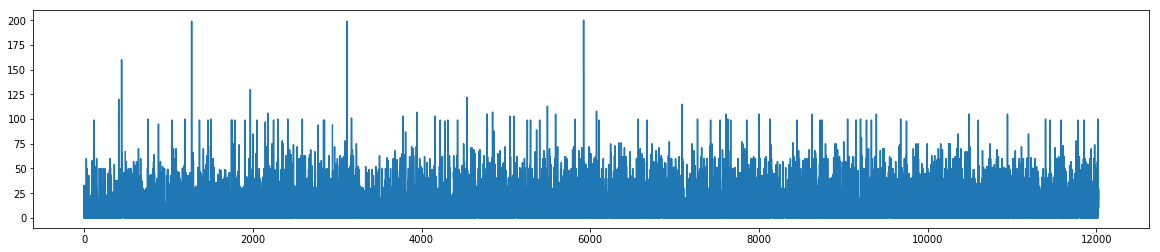

In [27]:
plt.figure(figsize=(20, 4))
plt.plot(train['date_range'].values)

In [26]:
train.sort_values('date_range', ascending=False)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,date_range
1745,2590fbaa10477ff1ff6f,65770b4b90c803e121b4,Gezicht op het Franse kamp op het Malieveld te...,Gezicht op het Franse kamp op het malieveld in...,Gezicht op het Franse kamp op het Malieveld te...,André,André,h 495mm × w 365mm,NaN,Gezicht op het Franse kamp op het Malieveld te...,gift,1939-01-01T00:00:00,"Gift of F.G. Waller, Amsterdam",1606 - 1806,1606.0,17,1606.0,1806.0,3,200.0
8571,b76a2b687a94468b1182,c9347479a6133629d95b,"Portrait of Gaston de Foix, French Military Co...","Portret van Gaston de Foix (1489-1512), frans ...","Portrait of Gaston de Foix, French Military Co...",anonymous,anonymous,h 53.2cm × w 46cm × t 1.5cm × d 2.4cm,NaN,"Portrait of Gaston de Foix, French Military Co...",nationalization 1795,1798-09-01T00:00:00,NaN,1600 - 1799,1600.0,16,1600.0,1799.0,11,199.0
5884,7d5303d7d9bbb90d1663,11d0706ace59d53b6ba4,Sint Nicolaasfeest,Interieur waarin een familie het Sint Nicolaas...,"Sint Nicolaasfeest, anonymous, 1700 - 1899",anonymous,anonymous,h 59cm × w 75cm × d 9.4cm,NaN,Sint Nicolaasfeest,bequest,1870-01-01T00:00:00,"Dupper Wzn. Bequest, Dordrecht",1700 - 1899,1700.0,17,1700.0,1899.0,54,199.0
827,1142a4e3eb5b5fb901d2,136df300aec2d46c4206,Portret van Rembrandt Harmensz. van Rijn,"Buste van een man, het gelaat en face, een ket...","Portret van Rembrandt Harmensz. van Rijn, Remb...",Rembrandt van Rijn,Rembrandt van Rijn,h 21cm × w 17cm × d 7.2cm,NaN,Portret van Rembrandt Harmensz. van Rijn Zelfp...,gift,1940-03-01T00:00:00,"Gift of Mr and Mrs Kessler-Hülsmann, Kapelle o...",1640 - 1800,1640.0,17,1640.0,1800.0,278,160.0
755,0fa6e904ea2df7bc1fed,6dca1517f93216bd7d95,Portrait of a Man,"Portret van een man. Buste naar rechts, de lin...","Portrait of a Man, Aert Pietersz. (copy after)...",Aert Pietersz.,Aert Pietersz.,h 56cm × w 46cm × d 7cm,NaN,Portrait of a Man,gift,1885-11-01T00:00:00,"Gift of Jonkheer J.S.R. van de Poll, Arnhem",1570 - 1700,1570.0,16,1570.0,1700.0,26,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,63528a07ae1bef516c8d,885c838ad997608f43be,mensen naast huis onder boom,NaN,"mensen naast huis onder boom, Fabio Ventura",Fabio Ventura,Fabio Ventura,h 301mm × w 242mm,NaN,mensen naast huis onder boom,transfer,1994-01-01T00:00:00,NaN,NaN,NaN,-2,NaN,NaN,5,NaN
5352,72d813952ee0010a8bbd,c114547ac5fdac73a567,Verdorvenheid en geweld op aarde vóór de zondv...,"Op de voorgrond worden mannen, vrouwen en kind...",Verdorvenheid en geweld op aarde vóór de zondv...,Johann Sadeler (I),Johann Sadeler (I),h 210mm × w 274mm,NaN,Verdorvenheid en geweld op aarde vóór de zondv...,transfer,1816-01-01T00:00:00,NaN,1586,1586.0,16,1586.0,NaN,4,NaN
3134,43b4da35661fb0c34413,d44af1b3af166eae9a76,jonge man biedt vrouw bloemen aan (nabootsing ...,NaN,jonge man biedt vrouw bloemen aan (nabootsing ...,Guido Rey,Guido Rey,h 204mm × w 154mm,NaN,jonge man biedt vrouw bloemen aan (nabootsing ...,transfer,1994-01-01T00:00:00,NaN,NaN,NaN,-2,NaN,NaN,3,NaN
3387,48df2346cc8cf4068cd0,d8153fbf3ea708eeaaab,abstractie in kleur,NaN,"abstractie in kleur, H.J. Schmidt",H.J. Schmidt,H.J. Schmidt,h 275mm × w 202mm,NaN,abstractie in kleur,transfer,1994-01-01T00:00:00,NaN,NaN,NaN,-2,NaN,NaN,0,NaN


In [34]:
train.sort_values('date_range', ascending=False).iloc[0]

object_id                                                2590fbaa10477ff1ff6f
art_series_id                                            65770b4b90c803e121b4
title                       Gezicht op het Franse kamp op het Malieveld te...
description                 Gezicht op het Franse kamp op het malieveld in...
long_title                  Gezicht op het Franse kamp op het Malieveld te...
principal_maker                                                         André
principal_or_first_maker                                                André
sub_title                                                   h 495mm × w 365mm
copyright_holder                                                          NaN
more_title                  Gezicht op het Franse kamp op het Malieveld te...
acquisition_method                                                       gift
acquisition_date                                          1939-01-01T00:00:00
acquisition_credit_line                        Gift of F.G. Wall

In [33]:
train.sort_values('date_range', ascending=False).iloc[1]

object_id                                                b76a2b687a94468b1182
art_series_id                                            c9347479a6133629d95b
title                       Portrait of Gaston de Foix, French Military Co...
description                 Portret van Gaston de Foix (1489-1512), frans ...
long_title                  Portrait of Gaston de Foix, French Military Co...
principal_maker                                                     anonymous
principal_or_first_maker                                            anonymous
sub_title                               h 53.2cm × w 46cm × t 1.5cm × d 2.4cm
copyright_holder                                                          NaN
more_title                  Portrait of Gaston de Foix, French Military Co...
acquisition_method                                       nationalization 1795
acquisition_date                                          1798-09-01T00:00:00
acquisition_credit_line                                         

In [35]:
train.sort_values('date_range', ascending=False).iloc[2]

object_id                                                7d5303d7d9bbb90d1663
art_series_id                                            11d0706ace59d53b6ba4
title                                                      Sint Nicolaasfeest
description                 Interieur waarin een familie het Sint Nicolaas...
long_title                         Sint Nicolaasfeest, anonymous, 1700 - 1899
principal_maker                                                     anonymous
principal_or_first_maker                                            anonymous
sub_title                                           h 59cm × w 75cm × d 9.4cm
copyright_holder                                                          NaN
more_title                                                 Sint Nicolaasfeest
acquisition_method                                                    bequest
acquisition_date                                          1870-01-01T00:00:00
acquisition_credit_line                        Dupper Wzn. Beque